# Практическое задание MLOps - 5


In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)  # Seed

## Генерация датасетов


### Первый датасет - тренировочный


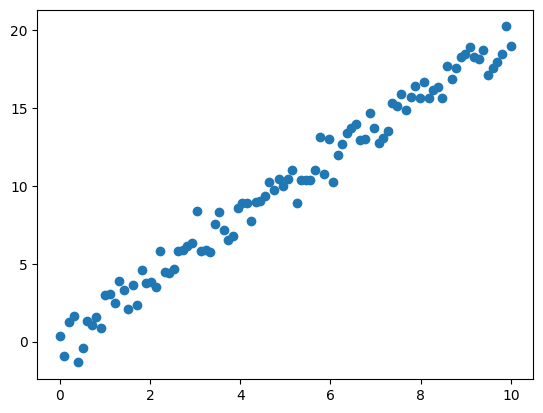

In [2]:
sigma = 1.1
noise = sigma * rng.standard_normal(100)

x_train = np.linspace(0, 10, 100)
y_train = 2 * x_train + noise

plt.scatter(x_train, y_train)
plt.show()

### Второй датасет - тестовый


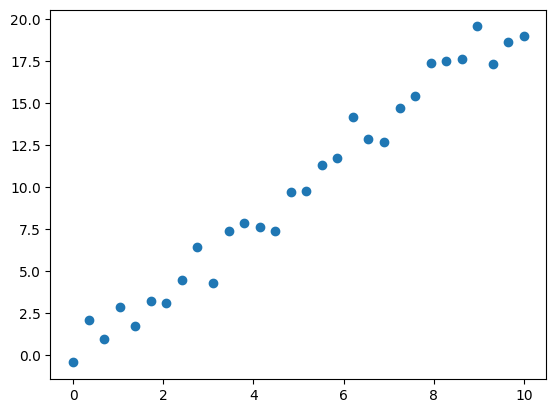

In [3]:
sigma = 1.1
noise = sigma * rng.standard_normal(30)

x_test = np.linspace(0, 10, 30)
y_test = (2 * x_test) + noise

plt.scatter(x_test, y_test)
plt.show()

### Третий датасет - новые данные. Зашумлённые


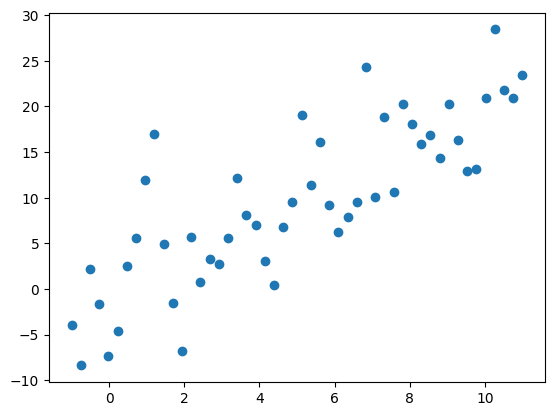

In [4]:
sigma = 5
noise = sigma * rng.standard_normal(50)

x_new = np.linspace(-1, 11, 50)
y_new = (2 * x_new) + noise

plt.scatter(x_new, y_new)
plt.show()

### Сохраним датасеты

In [5]:
import os
import pandas as pd

In [6]:
os.makedirs("../data", exist_ok=True)

x_train = pd.DataFrame(x_train, columns=["x_feature"])
x_train.to_csv("../data/x_train.csv", index=False)

x_test = pd.DataFrame(x_test, columns=["x_feature"])
x_test.to_csv("../data/x_test.csv", index=False)

x_new = pd.DataFrame(x_new, columns=["x_feature"])
x_new.to_csv("../data/x_new.csv", index=False)

y_train = pd.DataFrame(y_train, columns=["y_target"])
y_train.to_csv("../data/y_train.csv", index=False)

y_test = pd.DataFrame(y_test, columns=["y_target"])
y_test.to_csv("../data/y_test.csv", index=False)

y_new = pd.DataFrame(y_new, columns=["y_target"])
y_new.to_csv("../data/y_new.csv", index=False)

## Обучим модель


### Обучим на первом датасете модель простой линейной регрессии Scikit-Learn.


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [8]:
model = LinearRegression()

In [9]:
model.fit(x_train, y_train)

LinearRegression()

### Проверим модель на тестовых данных.

In [10]:
y_pred = model.predict(x_test)

In [11]:
r2 = r2_score(y_test, y_pred)
r2

0.9748901395775524

### Сохраним модель и метрику


In [12]:
import pickle

In [13]:
os.makedirs("../model", exist_ok=True)
with open("../model/model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("../model/score.txt", "w") as f:
    f.write(str(r2))

## Тестирование

### Запустим тестирование модели на новых данных с помощью PyTest.

In [14]:
! cd.. && pytest

============================= test session starts =============================
platform win32 -- Python 3.12.1, pytest-8.2.0, pluggy-1.5.0
rootdir: c:\Users\nymle\dev\repos\URFU\MLOps\Lab-5
plugins: anyio-4.1.0
collected 1 item

test\test_model.py F                                                     [100%]

================================== FAILURES ===================================
_________________________________ test_model __________________________________

    def test_model():
        x_new = pd.read_csv("data/x_new.csv")
        y_new = pd.read_csv("data/y_new.csv")
        model = pickle.load(open("model/model.pkl", "rb"))
    
        with open("model/score.txt", "r") as f:
            score = float(f.read())
    
        y_pred = model.predict(x_new)
        r2 = r2_score(y_new, y_pred)
    
        score = 0.95 * score
>       assert r2 >= score
E       assert 0.6649640308853342 >= 0.9261456325986748

test\test_model.py:19: AssertionError
==============================

## Выводы:
* Получили ожидаемый провал теста. Работа выполнена.